In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
from mysql.connector import errorcode
from urllib.parse import quote_plus
from sqlalchemy import create_engine

In [13]:
config = {
    'host': 'localhost',
    'user': 'root',
    'password': '@Pandasz1383',
    'database': 'Basketball_Reference'
}

password = quote_plus("@Pandasz1383")
engine = create_engine(
    f"mysql+mysqlconnector://{config['user']}:{password}@{config['host']}/{config['database']}"
)

In [14]:
query = """
            SELECT p.Name, COUNT(mjt.TrophyID) AS Trophy_Count, p.PTS , p.Age ,p.Experience
            FROM michael_jordan_trophy mjt
            JOIN players p ON mjt.PlayerID = p.PlayerID
            JOIN player_positions pp ON p.PlayerID = pp.PlayerID
            JOIN positions pos ON pp.PositionID = pos.PositionID
            WHERE pos.PositionName = 'Point Guard'
            GROUP BY p.PlayerID
            ORDER BY Trophy_Count DESC;
        """
pointguards = pd.read_sql(query, engine)
        
print(pointguards)

                       Name  Trophy_Count   PTS  Age  Experience
0     Giannis Antetokounmpo             5  23.9   30          12
1               Luka Dončić             5  28.6   26           7
2             Stephen Curry             3  24.7   37          16
3              LeBron James             3  27.0   40          22
4                Chris Paul             3  17.0   40          20
5             Jalen Brunson             2  18.1   29           7
6   Shai Gilgeous-Alexander             2  24.4   27           7
7                 Ja Morant             2  22.6   26           6
8            Damian Lillard             2  25.1   35          13
9              James Harden             2  24.1   36          16
10        Russell Westbrook             1  21.2   36          17
11            Derrick White             1  13.0   31           8
12         Donovan Mitchell             1  24.7   29           8
13             De'Aaron Fox             1  21.5   27           8
14             Devin Book

In [24]:
sorted_pointguards = pointguards.sort_values(
    by=['Trophy_Count', 'Age', 'PTS', 'Experience'],
    ascending=[False, True, False, False]
)

top3_pointguards = sorted_pointguards.head(3)
top3_pointguards = top3_pointguards.reset_index(drop=True)
top3_pointguards.index = top3_pointguards.index + 1
print(top3_pointguards)

                    Name  Trophy_Count   PTS  Age  Experience
1            Luka Dončić             5  28.6   26           7
2  Giannis Antetokounmpo             5  23.9   30          12
3          Stephen Curry             3  24.7   37          16


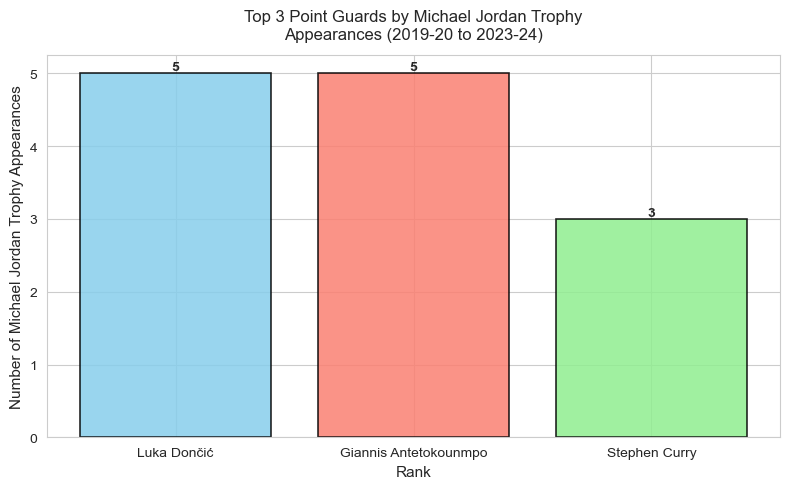

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")


bars = plt.bar(range(len(top3_pointguards)), 
               top3_pointguards['Trophy_Count'],
               color=['skyblue', 'salmon', 'lightgreen'], 
               edgecolor='black', 
               linewidth=1.2,
               alpha=0.85)


plt.xlabel('Rank', fontsize=11)
plt.ylabel('Number of Michael Jordan Trophy Appearances', fontsize=11)
plt.title('Top 3 Point Guards by Michael Jordan Trophy\nAppearances (2019-20 to 2023-24)', 
          fontsize=12, pad=12)


plt.xticks(range(len(top3_pointguards)), 
           top3_pointguards['Name'].apply(lambda x: x.title()), 
           fontsize=10)


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')


plt.tight_layout()
plt.savefig('point_guard_recommendations.png', dpi=300, bbox_inches='tight')
plt.show()

<div style="font-family:Tahoma, sans-serif; direction:rtl; line-height:1.8; font-size:17px; text-align:justify; padding:12px; border:1px solid #ddd; border-radius:8px; box-sizing:border-box; max-width:100%; margin:0 auto;">
  <p style="font-weight:bold; color:#0066cc; margin-top:0;">
    مقدمه
  </p>
  <p>
    باشگاه قصد دارد فصل آینده را با شروعی قدرتمند آغاز کند و باور دارد سرمایه‌گذاری روی پوزیشنی که نیازمند هوش بسکتبالی بالا و توانایی تصمیم‌گیری سریع است، می‌تواند شانس موفقیت را افزایش دهد. به همین دلیل، تمرکز باشگاه روی جذب بازیکنی توانمند در پوزیشن <strong>Point Guard</strong> است. معیار اصلی باشگاه برای سنجش توانایی، <strong>تعداد حضور در لیست Trophy Michael Jordan</strong> است که نشان‌دهنده اعتبار و عملکرد برجسته بازیکن در سطح لیگ می‌باشد.
  </p>
</div>

<div style="font-family:Tahoma, sans-serif; direction:rtl; line-height:1.8; font-size:17px; text-align:justify; padding:12px; border:1px solid #ddd; border-radius:8px; box-sizing:border-box; max-width:100%; margin:0 auto; margin-top:15px;">
  <p style="font-weight:bold; color:#0066cc; margin-top:0;">
    معیار انتخاب
  </p>
  <p>
    بر اساس داده‌های آماری فصل‌های ۲۰۱۹–۲۰۲۰ تا ۲۰۲۳–۲۰۲۴، و با اعمال اولویت‌های زیر در سورت:
    <br>
    - بیشترین تعداد Trophy<br>
    - کمترین سن<br>
    - بیشترین میانگین امتیاز (PTS)<br>
    - بیشترین تجربه<br>
    سه بازیکن زیر به‌عنوان گزینه‌های پیشنهادی انتخاب شدند:
  </p>
</div>

<div style="font-family:Tahoma, sans-serif; direction:rtl; line-height:1.8; font-size:17px; text-align:justify; padding:12px; border:1px solid #ddd; border-radius:8px; box-sizing:border-box; max-width:100%; margin:0 auto; margin-top:15px;">
  <p style="font-weight:bold; color:#0066cc; margin-top:0;">
    1. Luka Dončić
  </p>
  <p>
    <strong>تعداد Trophy:</strong> ۵<br>
    <strong>سن:</strong> ۲۶ سال<br>
    <strong>PTS:</strong> ۲۸.۶<br>
    <strong>تجربه:</strong> ۷ فصل<br>
    بازیکنی جوان، با بیشترین امتیاز و بیشترین حضور در لیست Trophy. در اوج آمادگی فیزیکی و ذهنی قرار دارد و می‌تواند ستون اصلی حمله تیم باشد.
  </p>
</div>

<div style="font-family:Tahoma, sans-serif; direction:rtl; line-height:1.8; font-size:17px; text-align:justify; padding:12px; border:1px solid #ddd; border-radius:8px; box-sizing:border-box; max-width:100%; margin:0 auto; margin-top:15px;">
  <p style="font-weight:bold; color:#0066cc; margin-top:0;">
    2. Giannis Antetokounmpo
  </p>
  <p>
    <strong>تعداد Trophy:</strong> ۵<br>
    <strong>سن:</strong> ۳۰ سال<br>
    <strong>PTS:</strong> ۲۳.۹<br>
    <strong>تجربه:</strong> ۱۲ فصل<br>
    ترکیبی از تجربه بالا و افتخارات زیاد. توانایی فیزیکی و حضور مؤثر در دفاع و حمله، او را به گزینه‌ای قدرتمند برای تیم‌هایی با هدف قهرمانی تبدیل می‌کند.
  </p>
</div>

<div style="font-family:Tahoma, sans-serif; direction:rtl; line-height:1.8; font-size:17px; text-align:justify; padding:12px; border:1px solid #ddd; border-radius:8px; box-sizing:border-box; max-width:100%; margin:0 auto; margin-top:15px;">
  <p style="font-weight:bold; color:#0066cc; margin-top:0;">
    3. Stephen Curry
  </p>
  <p>
    <strong>تعداد Trophy:</strong> ۳<br>
    <strong>سن:</strong> ۳۷ سال<br>
    <strong>PTS:</strong> ۲۴.۷<br>
    <strong>تجربه:</strong> ۱۶ فصل<br>
    باتجربه‌ترین بازیکن لیست. رهبر در زمین، با هوش بسکتبالی فوق‌العاده و تخصص در شوت‌زنی. مناسب برای تیم‌هایی که به دنبال ثبات و رهبری هستند.
  </p>
</div>

<div style="font-family:Tahoma, sans-serif; direction:rtl; line-height:1.8; font-size:17px; text-align:justify; padding:12px; border:1px solid #ddd; border-radius:8px; box-sizing:border-box; max-width:100%; margin:0 auto; margin-top:15px;">
  <p style="font-weight:bold; color:#0066cc; margin-top:0;">
    جمع‌بندی
  </p>
  <p>
    با توجه به اهداف باشگاه، اگر تمرکز روی سرمایه‌گذاری بلندمدت باشد، <strong>Luka Dončić</strong> بهترین گزینه است. اگر تجربه و فیزیک در اولویت باشد، <strong>Giannis</strong> انتخابی قدرتمند است. و اگر باشگاه به دنبال رهبری و ثبات در زمین باشد، <strong>Stephen Curry</strong> گزینه‌ای مطمئن خواهد بود. باشگاه می‌تواند با انتخاب یکی از این سه بازیکن، شانس خود را برای شروعی موفق و رقابتی در فصل آینده به‌طور چشمگیری افزایش دهد.
  </p>
</div>